In [101]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import copy
import networkx as nx
from collections import Counter
import numpy as np

In [2]:
df_trec = pd.read_parquet("../../../data/network_parquet_files/Network_preparations_TREC.parquet")
df_ceur = pd.read_parquet("../../../data/network_parquet_files/Network_preparations_CEUR.parquet")
df_lncs = pd.read_parquet("../../../data/network_parquet_files/Network_preparations_LNCS.parquet")

# Calculate the Coverage gain by using GROBID

In [3]:
counter = 0
for i, j in df_trec.iterrows():
    if len(j["Countries"]) == 0 and len(j["grobid"]) == 0:
        counter += 1

In [4]:
counter

342

In [5]:
len(df_trec) - 342

1368

In [6]:
1368/len(df_trec)

0.8

In [7]:
counter = 0
for i, j in df_lncs.iterrows():
    if len(j["Countries"]) == 0 and len(j["grobid"]) == 0:
        counter += 1

In [8]:
counter

44

In [9]:
len(df_lncs)-44

1181

In [10]:
1181/len(df_lncs)

0.9640816326530612

In [11]:
counter = 0
for i, j in df_ceur.iterrows():
    if len(j["Countries"]) == 0 and len(j["grobid"]) == 0:
        counter += 1

In [12]:
counter

417

In [13]:
len(df_ceur)-417

2441

In [14]:
2441/len(df_ceur)

0.8540937718684395

# Analysis of the German IR Community

In [15]:
df_trec["Proceeding"] = "TREC"
df_lncs["Proceeding"] = "LNCS"
df_ceur["Proceeding"] = "CEUR"

In [16]:
df_german = pd.concat([df_ceur, df_lncs, df_trec], axis=0)

In [17]:
# Create a complete list of all country name variations occuring in OpenAlex and Grobid

countries = []
for i , j in df_german.iterrows():
    for k in j["Countries"]:
        if k[0] not in countries:
            countries.append(k[0])
    for k in j["grobid"]:
        if k[0] not in countries:
            countries.append(k[0])

In [18]:
countries

['Australia',
 'France',
 'Ireland',
 'USA',
 'Germany',
 'Switzerland',
 'The Netherlands',
 'Czech Republic',
 'Portugal',
 'China',
 'Japan',
 'Spain',
 'Argentina',
 'United Kingdom',
 'Italy',
 'United States',
 'Korea, Republic of',
 'Niger',
 'Malaysia',
 'Turkey',
 'Hungary',
 'UK',
 'Netherlands',
 'Greece',
 'Austria',
 'Belgium',
 'México',
 'Bulgaria',
 'Qatar',
 'India',
 'Russia',
 'Iran',
 'Mexico',
 'Pakistan',
 'Denmark',
 'the Netherlands',
 'Tunisia',
 'Taiwan, R.O.C',
 'Taiwan R',
 'Sweden',
 'Canada',
 'Viet Nam',
 'France (',
 'Vietnam (',
 'Brazil',
 'Brasil',
 'Singapore',
 'S.A',
 'Egypt',
 'P. R. China',
 'Colombia',
 'Romania',
 'RO',
 'North Macedonia',
 'Slovenia',
 'Macedonia',
 'P.R. China',
 'Poland',
 'Myanmar',
 'Norway',
 'Basque Country',
 'Indonesia',
 'España',
 'Chile',
 'Saudi Arabia',
 'USA http',
 'SPAIN',
 'Taiwan, Province of China',
 'TAIWAN R.O.C',
 'Finland',
 'Spainj',
 'U.K',
 'Thailand',
 'Scotland',
 'South Korea',
 'Taiwan',
 'Kingdom

In [19]:
# Manually created list of all variations of Germany occuring in the data

concordance_list = ["Germany", 'Germany, Germany', "Germany (", "GERMANY", "Germany [", "Germany, www", "Canada), UK) IAI (Germany" ]

In [20]:
# Filter documents by participating institutions from Germany 
german_participation = []
for i, j in df_german.iterrows():
    for k in j["Countries"]:
        if k[0] in concordance_list:
            if i not in german_participation:
                german_participation.append(i)
    for k in j["grobid"]:
        if k[0] in concordance_list:
            if i not in german_participation:
                german_participation.append(i)

In [21]:
df_german = df_german.loc[german_participation]


In [22]:
df_german

,PubYear,CEUR Title,Volume,filename,Title,Section,Authors,url,ID,Countries,...,Proceeding,Book Subtitle,Book Title,Filename,Subsection,DOI,Citation count,Authors & Affiliations,filepath,Classification
5,2016,Working Notes of CLEF 2016 - Conference and La...,Vol-1609,16090069.pdf,Wrappers for Feature Subset Selection in CRF-b...,CLEFeHealth,"[Mike Ebersbach, Robert Herms, Christina Lohr,...",https://ceur-ws.org/Vol-1609/16090069.pdf,ceur_1025,[],...,CEUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005,NaN,NaN,NaN,Using the X-IOTA System in Mono- and Bilingual...,Cross-Language and More,NaN,NaN,lncs_7,"[[France, Techniques for Biomedical Engineerin...",...,LNCS,6th Workshop of the Cross-Language Evaluation ...,Accessing Multilingual Information Repositories,11878773_7.pdf,Uncategorized,https://doi.org/10.1007/11878773_7,Not found,"[['Laboratoire CLIPS-IMAG, Grenoble, France', ...",NaN,NaN
5,2000,NaN,NaN,qa_overview.pdf,Overview of the TREC-9 Question Answering Track.,Uncategorized,[Ellen M. Voorhees],http://trec.nist.gov/pubs/trec9/papers/qa_over...,trec_6,[],...,TREC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D:/Studium/Masterarbeit/PythonProject/data/PDF...,Uncategorized
45,2016,Working Notes of CLEF 2016 - Conference and La...,Vol-1609,16090481.pdf,SeaCLEF 2016: Object Proposal Classification f...,LifeCLEF,"[Jonas Jäger, Erik Rodner, Joachim Denzler, Vi...",https://ceur-ws.org/Vol-1609/16090481.pdf,ceur_1065,[],...,CEUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,2005,NaN,NaN,NaN,A Full Data-Driven System for Multiple Languag...,Part IV. Multiple Language Question Answering ...,NaN,NaN,lncs_47,"[[Mexico, National Institute of Astrophysics, ...",...,LNCS,6th Workshop of the Cross-Language Evaluation ...,Accessing Multilingual Information Repositories,11878773_47.pdf,Uncategorized,https://doi.org/10.1007/11878773_47,7,"[['Instituto Nacional de Astrofísica, Óptica y...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,2020,NaN,NaN,CiTIUS.HM.pdf,CiTIUS at the TREC 2020 Health Misinformation ...,Participant Papers,"[Marcos Fernández-Pichel, David E. Losada, Jua...",https://trec.nist.gov/pubs/trec29/papers/CiTIU...,trec_1761,"[[Spain, Universidade de Santiago de Compostel...",...,TREC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D:/Studium/Masterarbeit/PythonProject/data/PDF...,Participant
1631,2017,Working Notes of CLEF 2017 - Conference and La...,Vol-1866,paper_123.pdf,Microblog Search Task at CLEF 2017: Query Gene...,CLEF Microblog Cultural Contextualization,"[Malek Hajjem, Chiraz Latiri]",https://ceur-ws.org/Vol-1866/paper_123.pdf,ceur_963,[],...,CEUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1631,2020,NaN,NaN,HSRM-LAVIS.DL.pdf,HSRM-LAVIS at TREC 2020 Deep Learning Track: N...,Participant Papers,"[Marco Wrzalik, Dirk Krechel]",https://trec.nist.gov/pubs/trec29/papers/HSRM-...,trec_1773,"[[Germany, RheinMain University of Applied Sci...",...,TREC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D:/Studium/Masterarbeit/PythonProject/data/PDF...,Participant
1639,2017,Working Notes of CLEF 2017 - Conference and La...,Vol-1866,invited_paper_1.pdf,Overview of the ImageCLEF 2017 Tuberculosis Ta...,ImageCLEF,"[Yashin Dicente Cid, Alexander Kalinovsky, Vit...",https://ceur-ws.org/Vol-1866/invited_paper_1.pdf,ceur_972,[],...,CEUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Create a complete list of all institutions mentioned regarding documents, where at least one German Institut participated

institutions = []
for i , j in df_german.iterrows():
    for k in j["Countries"]:
        if [k[1], k[0]] not in institutions:
            if k[1] == "Information Science":
                institutions.append(["University of Hildesheim", k[0]])
            else:
                institutions.append([k[1], k[0]])
    for h in j["grobid"]:
        if [h[1], h[0]] not in institutions:
            if h[1] == "Information Science":
                institutions.append(["University of Hildesheim", h[0]])
            else:
                institutions.append([h[1], h[0]])

In [24]:
len(institutions)

1502

In [25]:
institutions = list(map(list, set(map(tuple, institutions))))

In [26]:
len(institutions)

1431

In [27]:
for index, item in enumerate(institutions):
    print(f"Index: {index}, {item[0]}, {item[1]}")

Index: 0, Xerox Research Centre Europe, France
Index: 1, Battelle, Switzerland
Index: 2, Centre for Language Technology Macquarie University Sydney, Australia
Index: 3, RALI/DIRO, Canada
Index: 4, Priberam Informática Av, Portugal
Index: 5, Eurospider Information Technology AG, Switzerland
Index: 6, Kairos GmbH, Germany
Index: 7, European Bioinformatics Institute, United Kingdom
Index: 8, Austrian Research Institute for Artificial Intelligence, Austria
Index: 9, DFKI, Germany
Index: 10, Indian Institute of Technology, India
Index: 11, Statistics Austria, Austria
Index: 12, University of Glasgow Glasgow, UK
Index: 13, Université Sorbonne Paris Nord, France
Index: 14, Consorzio per il Trasferimento Tecnologico -C2T, Italy
Index: 15, ETHZ, Switzerland
Index: 16, Medialab BV, The Netherlands
Index: 17, Elsevier BV, Netherlands
Index: 18, University Medical Center Utrecht, Netherlands
Index: 19, Hubei University of Technology Wuhan, China
Index: 20, Knowledge Management, Germany
Index: 21, 

In [28]:
# Create a complete list of all author names mentioned regarding documents, where at least one German Institut participated

authors = []
for i , j in df_german.iterrows():
    for k in j["Countries"]:
        if k[2] not in authors:
            authors.append(k[2])
    for h in j["grobid"]:
        if h[2] not in authors:
            authors.append(h[2])

In [29]:
from thefuzz import fuzz

# Grouping author names by fuzzy match similarity 

def group_similar_strings(strings, threshold=90):
    groups = []
    
    while strings:
        current_string = strings.pop(0)
        group = [current_string]
        
        similar_strings = []
        
        for other_string in strings:
            similarity = fuzz.ratio(current_string, other_string)
            if similarity >= threshold:
                group.append(other_string)
                similar_strings.append(other_string)
        
        for similar_string in similar_strings:
            strings.remove(similar_string)
        
        groups.append(group)
    
    return groups

result = group_similar_strings(authors.copy())

counter_1 = 0
counter_2 = 0
author_list_1 = []
author_list_2 = []
for group in result:
    if len(group) > 1:
        counter_1 +=1
        author_list_2.append(group)
    else:
        counter_2 +=1
        author_list_1.append(group[0])
    

In [30]:
len(author_list_2)

121

In [31]:
# Reassign authors that were matched by fuzzy matching due to relatively high error rate

def flatten(lst):
    flat_list = []
    for item in lst:
        if isinstance(item, list):
            flat_list.extend(flatten(item))
        else:
            flat_list.append(item)
    return flat_list

flat_author_list = flatten(author_list_2)

In [32]:
len(flat_author_list)

245

In [33]:
for index, item in enumerate(author_list_1):
    print(f"Index: {index}, {item}")

Index: 0, Mike Ebersbach
Index: 1, Robert Herms
Index: 2, Christina Lohr
Index: 3, Maximilian Eibl
Index: 4, Loïc Maisonnasse
Index: 5, Gilles Sérasset
Index: 6, Jean–Pierre Chevallet
Index: 7, Jonas Jäger
Index: 8, Erik Rodner
Index: 9, Joachim Denzler
Index: 10, Viviane Wolff
Index: 11, Klaus Fricke-Neuderth
Index: 12, Luis Villaseñor-Pineda
Index: 13, Manuel Pérez-Coutiño
Index: 14, José Manuel Gómez-Soriano
Index: 15, Paolo Rosso
Index: 16, Jose Luis
Index: 17, Antonio Ferrández
Index: 18,  
Index: 19, Paul Clough
Index: 20, Thomas Deselaers
Index: 21, Michael Grubinger
Index: 22, Thomas Lehmann
Index: 23, William Hersh
Index: 24, Benjamin Kille
Index: 25, Andreas Lommatzsch
Index: 26, Frank Hopfgartner
Index: 27, Martha Larson
Index: 28, Jonas Seiler
Index: 29, Davide Malagoli
Index: 30, András Serény
Index: 31, Torben Brodt
Index: 32, Clement H. C. Leung
Index: 33, Alexandru Ciobanu
Index: 34, Gareth Jones
Index: 35, Kieran McDonald
Index: 36, Jaschar Domann
Index: 37, Jens Meine

In [34]:
new_list = author_list_1 + flat_author_list

In [35]:
for index, item in enumerate(new_list):
    print(f"Index: {index}, {item}")

Index: 0, Mike Ebersbach
Index: 1, Robert Herms
Index: 2, Christina Lohr
Index: 3, Maximilian Eibl
Index: 4, Loïc Maisonnasse
Index: 5, Gilles Sérasset
Index: 6, Jean–Pierre Chevallet
Index: 7, Jonas Jäger
Index: 8, Erik Rodner
Index: 9, Joachim Denzler
Index: 10, Viviane Wolff
Index: 11, Klaus Fricke-Neuderth
Index: 12, Luis Villaseñor-Pineda
Index: 13, Manuel Pérez-Coutiño
Index: 14, José Manuel Gómez-Soriano
Index: 15, Paolo Rosso
Index: 16, Jose Luis
Index: 17, Antonio Ferrández
Index: 18,  
Index: 19, Paul Clough
Index: 20, Thomas Deselaers
Index: 21, Michael Grubinger
Index: 22, Thomas Lehmann
Index: 23, William Hersh
Index: 24, Benjamin Kille
Index: 25, Andreas Lommatzsch
Index: 26, Frank Hopfgartner
Index: 27, Martha Larson
Index: 28, Jonas Seiler
Index: 29, Davide Malagoli
Index: 30, András Serény
Index: 31, Torben Brodt
Index: 32, Clement H. C. Leung
Index: 33, Alexandru Ciobanu
Index: 34, Gareth Jones
Index: 35, Kieran McDonald
Index: 36, Jaschar Domann
Index: 37, Jens Meine

In [73]:
counter_1

121

In [74]:
counter_2

2183

In [37]:
# Read in the manually created index list in order to agggregate similar authors

file_path = '../../../data/name_index_mapping.txt'

nested_list_of_indices = []

with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()
        
        number_list = line.split(' - ')
        
        number_list = [int(number) for number in number_list]
        
        nested_list_of_indices.append(number_list)

print(nested_list_of_indices)

[[1571, 16], [795, 797], [34, 185], [1164, 47], [48, 1636], [52, 277, 2176, 2175], [2142, 2145], [92, 94], [1821, 1823], [100, 101], [133, 108], [109, 134], [110, 135], [126, 137], [132, 138], [721, 153], [2059, 155], [1166, 159, 161], [160, 162], [1177, 183], [223, 224], [225, 254], [226, 249], [229, 676], [1884, 256], [1760, 1761], [276, 382], [1890, 285], [1893, 287], [622, 295], [309, 1272], [319, 320, 436], [1827, 327, 1829], [1363, 335], [1412, 341], [344, 345, 1269], [361, 1171], [399, 403], [1498, 1499], [661, 662], [1389, 514], [1170, 530], [545, 547], [1951, 578, 759], [467, 674], [675, 678], [1165, 680], [692, 1992], [693, 1046, 1122], [699, 701], [703, 704], [715, 719], [2052, 2054], [737, 738], [784, 786], [1349, 1351], [803, 805], [815, 818], [838, 840], [852, 853], [1835, 855], [861, 1783], [871, 876], [873, 880], [893, 1950], [903, 1659], [1582, 909], [1157, 920], [1001, 1003], [1023, 1029], [1053, 1054, 1353], [1055, 1058], [1056, 1059], [1073, 1074], [1158, 1161], [11

In [39]:
# Apply the nested list of indices in order to create concordance lists of the author names
name_concordance_list = []
for i in nested_list_of_indices:
    temp_list = []
    for j in i:
        temp_list.append(new_list[j])
    name_concordance_list.append(temp_list)

In [40]:
name_concordance_list

[['José Luis', 'Jose Luis'],
 ['Davide Feltoni Gurini', 'Davide Gurini'],
 ['Gareth Jones', 'Gareth J. F. Jones'],
 ['Fredric Gey', 'Fredric C. Gey'],
 ['Douglas W. Oard', 'Douglas Oard'],
 ['L. Alfonso Ureña‐López', 'L. Alfonso Ureña', 'Ureña López', 'L Alfonso'],
 ['Francisco J. Ribadas-Pena', 'Francisco Ribadas'],
 ['John D. Burger', 'John Burger'],
 ['John J. Collins', 'John Collins'],
 ['Mark J. Huiskes', 'Mark Huiskes'],
 ['Asma Abacha', 'Asma Ben Abacha'],
 ['Vivek V. Datla', 'Vivek Datla'],
 ['Sadid A. Hasan', 'Sadid Hasan'],
 ['Adrian F. Clark', 'Adrian Clark'],
 ['Mihai Gabriel Constantin', 'Mihai Constantin'],
 ['Patrice Bellot', 'P Bellot'],
 ['Marc El-Bèze', 'M El-Bèze'],
 ['Giorgio Nunzio', 'Giorgio Maria Di Nunzio', 'Giorgio Di'],
 ['Julia Maria Schulz', 'Julia Schulz'],
 ['Ingo Gl', 'Ingo Glöckner'],
 ['Antal van den Bosch', 'Antal Van Den Bosch'],
 ['Gautam Kishore', 'Gautam Kishore Shahi'],
 ['Julia Struß', 'Julia Maria Struß'],
 ['Charles Clarke', 'Charles L. A. Clar

In [41]:
len(name_concordance_list)

222

In [42]:
# Create a list of dictioanries where the key is the longest variation of the underlying author name. 
# The key will then be applied in order to unify the authors

list_of_concordance_dicts = []


for sublist in name_concordance_list:
    longest_string = max(sublist, key=len)
    
    sublist_dict = {longest_string: sublist}
    
    list_of_concordance_dicts.append(sublist_dict)

print(list_of_concordance_dicts)

[{'José Luis': ['José Luis', 'Jose Luis']}, {'Davide Feltoni Gurini': ['Davide Feltoni Gurini', 'Davide Gurini']}, {'Gareth J. F. Jones': ['Gareth Jones', 'Gareth J. F. Jones']}, {'Fredric C. Gey': ['Fredric Gey', 'Fredric C. Gey']}, {'Douglas W. Oard': ['Douglas W. Oard', 'Douglas Oard']}, {'L. Alfonso Ureña‐López': ['L. Alfonso Ureña‐López', 'L. Alfonso Ureña', 'Ureña López', 'L Alfonso']}, {'Francisco J. Ribadas-Pena': ['Francisco J. Ribadas-Pena', 'Francisco Ribadas']}, {'John D. Burger': ['John D. Burger', 'John Burger']}, {'John J. Collins': ['John J. Collins', 'John Collins']}, {'Mark J. Huiskes': ['Mark J. Huiskes', 'Mark Huiskes']}, {'Asma Ben Abacha': ['Asma Abacha', 'Asma Ben Abacha']}, {'Vivek V. Datla': ['Vivek V. Datla', 'Vivek Datla']}, {'Sadid A. Hasan': ['Sadid A. Hasan', 'Sadid Hasan']}, {'Adrian F. Clark': ['Adrian F. Clark', 'Adrian Clark']}, {'Mihai Gabriel Constantin': ['Mihai Gabriel Constantin', 'Mihai Constantin']}, {'Patrice Bellot': ['Patrice Bellot', 'P Bell

In [43]:
# Apply the concordance dicts to unify author names

def replace_in_nested_lists(nested_lists, replacement_dicts):
    for sublist in nested_lists:
        if len(sublist) > 2:
            third_element = sublist[2]
            for replacement_dict in replacement_dicts:
                for key, value_list in replacement_dict.items():
                    if third_element in value_list:
                        sublist[2] = key
                        break
                else:
                    continue
                break
    return nested_lists

df_german['Countries_new'] = df_german['Countries'].apply(lambda x: replace_in_nested_lists(copy.deepcopy(x), list_of_concordance_dicts))
df_german['grobid_new'] = df_german['grobid'].apply(lambda x: replace_in_nested_lists(copy.deepcopy(x), list_of_concordance_dicts))

In [44]:
df_german

,PubYear,CEUR Title,Volume,filename,Title,Section,Authors,url,ID,Countries,...,Book Title,Filename,Subsection,DOI,Citation count,Authors & Affiliations,filepath,Classification,Countries_new,grobid_new
5,2016,Working Notes of CLEF 2016 - Conference and La...,Vol-1609,16090069.pdf,Wrappers for Feature Subset Selection in CRF-b...,CLEFeHealth,"[Mike Ebersbach, Robert Herms, Christina Lohr,...",https://ceur-ws.org/Vol-1609/16090069.pdf,ceur_1025,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"[[Germany, Chair Media Informatics, Mike Ebers..."
5,2005,NaN,NaN,NaN,Using the X-IOTA System in Mono- and Bilingual...,Cross-Language and More,NaN,NaN,lncs_7,"[[France, Techniques for Biomedical Engineerin...",...,Accessing Multilingual Information Repositories,11878773_7.pdf,Uncategorized,https://doi.org/10.1007/11878773_7,Not found,"[['Laboratoire CLIPS-IMAG, Grenoble, France', ...",NaN,NaN,"[[France, Techniques for Biomedical Engineerin...",[]
5,2000,NaN,NaN,qa_overview.pdf,Overview of the TREC-9 Question Answering Track.,Uncategorized,[Ellen M. Voorhees],http://trec.nist.gov/pubs/trec9/papers/qa_over...,trec_6,[],...,NaN,NaN,NaN,NaN,NaN,NaN,D:/Studium/Masterarbeit/PythonProject/data/PDF...,Uncategorized,[],[]
45,2016,Working Notes of CLEF 2016 - Conference and La...,Vol-1609,16090481.pdf,SeaCLEF 2016: Object Proposal Classification f...,LifeCLEF,"[Jonas Jäger, Erik Rodner, Joachim Denzler, Vi...",https://ceur-ws.org/Vol-1609/16090481.pdf,ceur_1065,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"[[Germany, Department of Electrical Engineerin..."
45,2005,NaN,NaN,NaN,A Full Data-Driven System for Multiple Languag...,Part IV. Multiple Language Question Answering ...,NaN,NaN,lncs_47,"[[Mexico, National Institute of Astrophysics, ...",...,Accessing Multilingual Information Repositories,11878773_47.pdf,Uncategorized,https://doi.org/10.1007/11878773_47,7,"[['Instituto Nacional de Astrofísica, Óptica y...",NaN,NaN,"[[Mexico, National Institute of Astrophysics, ...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,2020,NaN,NaN,CiTIUS.HM.pdf,CiTIUS at the TREC 2020 Health Misinformation ...,Participant Papers,"[Marcos Fernández-Pichel, David E. Losada, Jua...",https://trec.nist.gov/pubs/trec29/papers/CiTIU...,trec_1761,"[[Spain, Universidade de Santiago de Compostel...",...,NaN,NaN,NaN,NaN,NaN,NaN,D:/Studium/Masterarbeit/PythonProject/data/PDF...,Participant,"[[Spain, Universidade de Santiago de Compostel...","[[Spain, Centro Singular de Investigación en T..."
1631,2017,Working Notes of CLEF 2017 - Conference and La...,Vol-1866,paper_123.pdf,Microblog Search Task at CLEF 2017: Query Gene...,CLEF Microblog Cultural Contextualization,"[Malek Hajjem, Chiraz Latiri]",https://ceur-ws.org/Vol-1866/paper_123.pdf,ceur_963,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"[[Tunisia, Faculty of Sciences of Tunis, Malek..."
1631,2020,NaN,NaN,HSRM-LAVIS.DL.pdf,HSRM-LAVIS at TREC 2020 Deep Learning Track: N...,Participant Papers,"[Marco Wrzalik, Dirk Krechel]",https://trec.nist.gov/pubs/trec29/papers/HSRM-...,trec_1773,"[[Germany, RheinMain University of Applied Sci...",...,NaN,NaN,NaN,NaN,NaN,NaN,D:/Studium/Masterarbeit/PythonProject/data/PDF...,Participant,"[[Germany, RheinMain University of Applied Sci...",[]
1639,2017,Working Notes of CLEF 2017 - Conference and La...,Vol-1866,invited_paper_1.pdf,Overview of the ImageCLEF 2017 Tuberculosis Ta...,ImageCLEF,"[Yashin Dicente Cid, Alexander Kalinovsky, Vit...",https://ceur-ws.org/Vol-1866/invited_paper_1.pdf,ceur_972,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"[[Switzerland, University of Applied Sciences ..."


In [45]:
concordance_list_ = ["Germany", 'Germany, Germany', "Germany (", "GERMANY", "Germany [", "Germany, www", "Canada), UK) IAI (Germany" ]

In [46]:
# Extract the german institutes from the DataFrame based on the concordance_list
german_institutes_full = []

for i, row in df_german.iterrows():
    german_institutes = []
    for sublist in row["Countries_new"]:
        if sublist[0] in concordance_list_:
            if sublist[1] not in german_institutes:
                if sublist[1] == "Information Science":
                    if "University of Hildesheim" not in german_institutes:
                        german_institutes.append("University of Hildesheim")
                else:
                    german_institutes.append(sublist[1])
    for sublist in row["grobid_new"]:
        if sublist[0] in concordance_list_:
            if sublist[1] not in german_institutes:
                if sublist[1] == "Information Science":
                    if "University of Hildesheim" not in german_institutes:
                        german_institutes.append("University of Hildesheim")
                else:
                    german_institutes.append(sublist[1])

    german_institutes_full.append(german_institutes)

In [47]:
df_german["German Institutes"] = german_institutes_full

In [48]:
df_german

,PubYear,CEUR Title,Volume,filename,Title,Section,Authors,url,ID,Countries,...,Filename,Subsection,DOI,Citation count,Authors & Affiliations,filepath,Classification,Countries_new,grobid_new,German Institutes
5,2016,Working Notes of CLEF 2016 - Conference and La...,Vol-1609,16090069.pdf,Wrappers for Feature Subset Selection in CRF-b...,CLEFeHealth,"[Mike Ebersbach, Robert Herms, Christina Lohr,...",https://ceur-ws.org/Vol-1609/16090069.pdf,ceur_1025,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"[[Germany, Chair Media Informatics, Mike Ebers...",[Chair Media Informatics]
5,2005,NaN,NaN,NaN,Using the X-IOTA System in Mono- and Bilingual...,Cross-Language and More,NaN,NaN,lncs_7,"[[France, Techniques for Biomedical Engineerin...",...,11878773_7.pdf,Uncategorized,https://doi.org/10.1007/11878773_7,Not found,"[['Laboratoire CLIPS-IMAG, Grenoble, France', ...",NaN,NaN,"[[France, Techniques for Biomedical Engineerin...",[],[]
5,2000,NaN,NaN,qa_overview.pdf,Overview of the TREC-9 Question Answering Track.,Uncategorized,[Ellen M. Voorhees],http://trec.nist.gov/pubs/trec9/papers/qa_over...,trec_6,[],...,NaN,NaN,NaN,NaN,NaN,D:/Studium/Masterarbeit/PythonProject/data/PDF...,Uncategorized,[],[],[]
45,2016,Working Notes of CLEF 2016 - Conference and La...,Vol-1609,16090481.pdf,SeaCLEF 2016: Object Proposal Classification f...,LifeCLEF,"[Jonas Jäger, Erik Rodner, Joachim Denzler, Vi...",https://ceur-ws.org/Vol-1609/16090481.pdf,ceur_1065,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"[[Germany, Department of Electrical Engineerin...",[Department of Electrical Engineering and Info...
45,2005,NaN,NaN,NaN,A Full Data-Driven System for Multiple Languag...,Part IV. Multiple Language Question Answering ...,NaN,NaN,lncs_47,"[[Mexico, National Institute of Astrophysics, ...",...,11878773_47.pdf,Uncategorized,https://doi.org/10.1007/11878773_47,7,"[['Instituto Nacional de Astrofísica, Óptica y...",NaN,NaN,"[[Mexico, National Institute of Astrophysics, ...",[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,2020,NaN,NaN,CiTIUS.HM.pdf,CiTIUS at the TREC 2020 Health Misinformation ...,Participant Papers,"[Marcos Fernández-Pichel, David E. Losada, Jua...",https://trec.nist.gov/pubs/trec29/papers/CiTIU...,trec_1761,"[[Spain, Universidade de Santiago de Compostel...",...,NaN,NaN,NaN,NaN,NaN,D:/Studium/Masterarbeit/PythonProject/data/PDF...,Participant,"[[Spain, Universidade de Santiago de Compostel...","[[Spain, Centro Singular de Investigación en T...","[University of Regensburg, Chair for Informati..."
1631,2017,Working Notes of CLEF 2017 - Conference and La...,Vol-1866,paper_123.pdf,Microblog Search Task at CLEF 2017: Query Gene...,CLEF Microblog Cultural Contextualization,"[Malek Hajjem, Chiraz Latiri]",https://ceur-ws.org/Vol-1866/paper_123.pdf,ceur_963,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"[[Tunisia, Faculty of Sciences of Tunis, Malek...",[]
1631,2020,NaN,NaN,HSRM-LAVIS.DL.pdf,HSRM-LAVIS at TREC 2020 Deep Learning Track: N...,Participant Papers,"[Marco Wrzalik, Dirk Krechel]",https://trec.nist.gov/pubs/trec29/papers/HSRM-...,trec_1773,"[[Germany, RheinMain University of Applied Sci...",...,NaN,NaN,NaN,NaN,NaN,D:/Studium/Masterarbeit/PythonProject/data/PDF...,Participant,"[[Germany, RheinMain University of Applied Sci...",[],[RheinMain University of Applied Sciences]
1639,2017,Working Notes of CLEF 2017 - Conference and La...,Vol-1866,invited_paper_1.pdf,Overview of the ImageCLEF 2017 Tuberculosis Ta...,ImageCLEF,"[Yashin Dicente Cid, Alexander Kalinovsky, Vit...",https://ceur-ws.org/Vol-1866/invited_paper_1.pdf,ceur_972,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"[[Switzerland, University of Applied Sciences ...",[]


In [49]:
# Explode the Dataframe in order to cound the occurences of German Institutes

df_exploded1 = df_german.explode('German Institutes')
pivot_df = df_exploded1.groupby(['German Institutes', 'Proceeding']).size().unstack(fill_value=0)
pivot_df['Total'] = pivot_df.sum(axis=1)


In [50]:
pivot_df = pivot_df.sort_values("Total", ascending=False)[:10]

In [51]:
pivot_df

Proceeding,CEUR,LNCS,TREC,Total
German Institutes,,,,
University of Hildesheim,31,29,0,60
Bauhaus-Universität Weimar,11,15,10,36
RWTH Aachen University,17,17,0,34
University of Hagen,12,20,0,32
German Research Centre for Artificial Intelligence,12,15,2,29
Leipzig University,15,13,1,29
Chemnitz University of Technology,10,13,0,23
Humboldt-Universität zu Berlin,7,11,0,18
Saarland University,5,7,3,15


In [52]:
latex_table = pivot_df.to_latex()

In [53]:
print(latex_table)

\begin{tabular}{lrrrr}
\toprule
Proceeding & CEUR & LNCS & TREC & Total \\
German Institutes &  &  &  &  \\
\midrule
University of Hildesheim & 31 & 29 & 0 & 60 \\
Bauhaus-Universität Weimar & 11 & 15 & 10 & 36 \\
RWTH Aachen University & 17 & 17 & 0 & 34 \\
University of Hagen & 12 & 20 & 0 & 32 \\
German Research Centre for Artificial Intelligence & 12 & 15 & 2 & 29 \\
Leipzig University & 15 & 13 & 1 & 29 \\
Chemnitz University of Technology & 10 & 13 & 0 & 23 \\
Humboldt-Universität zu Berlin & 7 & 11 & 0 & 18 \\
Saarland University & 5 & 7 & 3 & 15 \\
Max Planck Society & 4 & 0 & 10 & 14 \\
\bottomrule
\end{tabular}



In [54]:
# Extract the participanting authors per document

amount_authors = []
for i, j in df_german.iterrows():
    unique_authors = []
    for k in j["Countries_new"]:
        if k[2] not in unique_authors:
            unique_authors.append(k[2])
    for l in j["grobid_new"]:
        if l[2] not in unique_authors:
            unique_authors.append(l[2])
    
    amount_authors.append(len(unique_authors))

In [55]:
df_german["Amount Authors"] = amount_authors

In [56]:
# Explode by German institutes again to get the German Institutes in separat rows

df_exploded = df_german.explode("German Institutes")

In [57]:
# Calculate the minimum, maximum and average amount of authors per german institute based on the extracted authors 

stats_df = df_exploded.groupby('German Institutes').agg(
    min_amount=('Amount Authors', 'min'),
    max_amount=('Amount Authors', 'max'),
    avg_amount=('Amount Authors', 'mean')
).reset_index()

In [58]:
stats_df

,German Institutes,min_amount,max_amount,avg_amount
0,-Essen University School of Medicine,2,2,2.0
1,-Speech Signal Processing,1,1,1.0
2,1Berlin,5,5,5.0
3,AIPHES / Knowledge Engineering Group Departmen...,1,1,1.0
4,AKSW,7,7,7.0
...,...,...,...,...
273,cesah GmbH,18,18,18.0
274,courtesy of TM Deserno,1,1,1.0
275,omni:us,20,20,20.0
276,plista GmbH,6,6,6.0


In [59]:
stats_df = stats_df[stats_df["German Institutes"].isin(list(pivot_df.index))]

In [60]:
# Sort German Insitutes descending based on the Top contributing Institutes
stats_df = stats_df.set_index('German Institutes').reindex(list(pivot_df.index)).reset_index()

In [61]:
stats_df

,German Institutes,min_amount,max_amount,avg_amount
0,University of Hildesheim,1,18,4.483333
1,Bauhaus-Universität Weimar,2,17,7.722222
2,RWTH Aachen University,1,17,4.588235
3,University of Hagen,1,7,1.906250
4,German Research Centre for Artificial Intellig...,2,18,4.172414
5,Leipzig University,1,17,7.310345
6,Chemnitz University of Technology,1,11,3.347826
7,Humboldt-Universität zu Berlin,1,10,4.777778
8,Saarland University,1,7,3.133333
9,Max Planck Society,1,9,4.071429


In [62]:
print(stats_df.to_latex())

\begin{tabular}{llrrr}
\toprule
 & German Institutes & min_amount & max_amount & avg_amount \\
\midrule
0 & University of Hildesheim & 1 & 18 & 4.483333 \\
1 & Bauhaus-Universität Weimar & 2 & 17 & 7.722222 \\
2 & RWTH Aachen University & 1 & 17 & 4.588235 \\
3 & University of Hagen & 1 & 7 & 1.906250 \\
4 & German Research Centre for Artificial Intelligence & 2 & 18 & 4.172414 \\
5 & Leipzig University & 1 & 17 & 7.310345 \\
6 & Chemnitz University of Technology & 1 & 11 & 3.347826 \\
7 & Humboldt-Universität zu Berlin & 1 & 10 & 4.777778 \\
8 & Saarland University & 1 & 7 & 3.133333 \\
9 & Max Planck Society & 1 & 9 & 4.071429 \\
\bottomrule
\end{tabular}



# Betweeness centrality Preparations (for Institutes)

In [63]:
# Extract all unique mentioned institutes from GROBID and OpenAlex

institutes_complete = []
for i, j in df_german.iterrows():
    institutes = []
    for k in j["Countries_new"]:
        if k[1] not in institutes:
            institutes.append(k[1])
        #print(value[1])
    for k in j["grobid_new"]:
        if k[1] not in institutes:
            institutes.append(k[1])
    institutes_complete.append(institutes)

In [64]:
len(institutes_complete)

1271

In [65]:
institutes_complete

[['Chair Media Informatics'],
 ['Techniques for Biomedical Engineering and Complexity Management–Informatics, Mathematics and Applications Grenoble',
  'National University of Singapore',
  'Agency for Science, Technology and Research'],
 [],
 ['Department of Electrical Engineering and Information Technology',
  'Computer Vision Group'],
 ['National Institute of Astrophysics, Optics and Electronics',
  'Universitat Politècnica de València'],
 ['Dpto. Lenguajes y Sistemas Informáticos. Universidad de Alicante'],
 ['Cologne University of Applied Sciences',
  'GESIS -Leibniz Institute for the Social Sciences'],
 ['University of Sheffield',
  'University Hospital of Geneva',
  'RWTH Aachen University',
  'Victoria University',
  'Oregon Health & Science University'],
 [],
 ['TU Berlin',
  'University of Glasgow',
  'TU Delft',
  'Plista GmbH',
  'ContentWise R&D -Moviri',
  'Gravity R&D'],
 ['Victoria University', 'University of Sheffield'],
 [],
 ['Technische Universität Berlin', 'DAI-Lab

In [66]:
# Extract all german institutes from GROBID and OpenAlex

german_institutes_complete = []

for i, row in df_german.iterrows():
    institutes = []
    for k in row["Countries_new"]:
        if k[0] in concordance_list_:
            if k[1] not in german_institutes_complete:
                german_institutes_complete.append(k[1])
    for k in row["grobid_new"]:
        if k[0] in concordance_list_:
            if k[1] not in german_institutes_complete:
                german_institutes_complete.append(k[1])

print(len(german_institutes_complete))

279


In [67]:
# Add a graph of cooperating institutes as "co-authorship graph"

G = nx.DiGraph()
for paper in institutes_complete:
    for i, institute1 in enumerate(paper):
        for institute2 in paper[i+1:]:
            G.add_edge(institute1, institute2)

In [68]:
# Calculate the Betweeness Centrality between the institutes

betweenness_centrality = nx.betweenness_centrality(G)

node_centrality_pairs = []
for node, centrality in betweenness_centrality.items():
    node_centrality_pairs.append([node, centrality])


In [69]:
node_centrality_pairs

[['Techniques for Biomedical Engineering and Complexity Management–Informatics, Mathematics and Applications Grenoble',
  0.0],
 ['National University of Singapore', 0.0],
 ['Agency for Science, Technology and Research', 0.0],
 ['Department of Electrical Engineering and Information Technology', 0.0],
 ['Computer Vision Group', 0.0],
 ['National Institute of Astrophysics, Optics and Electronics',
  0.0023576439649435382],
 ['Universitat Politècnica de València', 0.007296155539831313],
 ['Cologne University of Applied Sciences', 0.0],
 ['GESIS -Leibniz Institute for the Social Sciences', 0.0005741472650800023],
 ['University of Sheffield', 0.009400818794536494],
 ['University Hospital of Geneva', 0.0009019674203604417],
 ['RWTH Aachen University', 0.010599978163564745],
 ['Victoria University', 0.00010246117687718443],
 ['Oregon Health & Science University', 0.00209944424574723],
 ['TU Berlin', 0.0005526602110236387],
 ['University of Glasgow', 0.004421699594149368],
 ['TU Delft', 1.0369

In [70]:
df_betweeness  = pd.DataFrame(node_centrality_pairs, columns=["Institute", "Betweeness"]).sort_values("Betweeness", ascending=False)

In [71]:
df_betweeness

,Institute,Betweeness
59,University of Applied Sciences and Arts Wester...,0.050158
67,Dublin City University,0.049367
45,University of Amsterdam,0.046038
167,Department of Computer Science,0.036348
378,UMR Botanique et Modélisation de l’Architectur...,0.031524
...,...,...
543,Toyohashi University of Technology,0.000000
544,School of Library and Information Science,0.000000
545,Universidade NOVA de Lisboa Caparica,0.000000
546,Jamie Callan Language and Technology Institute...,0.000000


In [72]:
# Filter out the non-german institutes
df_betweeness = df_betweeness[df_betweeness["Institute"].isin(german_institutes_complete)].sort_values("Betweeness", ascending=False)

In [73]:
df_betweeness.head(10)

,Institute,Betweeness
167,Department of Computer Science,0.036348
92,Information Science,0.030790
373,Chemnitz University of Technology,0.030435
302,Computer Science Department,0.022732
197,Leipzig University,0.017263
11,RWTH Aachen University,0.010600
239,German Research Centre for Artificial Intellig...,0.010328
90,University of Hildesheim,0.009505
43,Humboldt-Universität zu Berlin,0.007321
30,Bauhaus-Universität Weimar,0.006644


# Betweeness centrality Preparations (for Authors)

In [74]:
# Create a list of all participating authors within the documents that have at least one german participating institute

authors_complete = []
for i, j in df_german.iterrows():
    authors = []
    for k in j["Countries_new"]:
        if k[2] not in authors:
            authors.append(k[2])
    for k in j["grobid_new"]:
        if k[2] not in authors:
            authors.append(k[2])
    authors_complete.append(authors)

In [75]:
df_german["authors_all"] = authors_complete

In [76]:
# Create a list of all authors within the documents that work for a german institute

german_authors_complete = []

for i, row in df_german.iterrows():
    institutes = []
    for k in row["Countries_new"]:
        if k[0] in concordance_list_:
            if k[2] not in german_authors_complete:
                german_authors_complete.append(k[2])
    for k in row["grobid_new"]:
        if k[0] in concordance_list_:
            if k[2] not in german_authors_complete:
                german_authors_complete.append(k[2])

print(len(german_authors_complete))

536


In [77]:
len(german_authors_complete)

536

In [78]:
german_authors_complete

['Mike Ebersbach',
 'Robert Herms',
 'Christina Lohr',
 'Maximilian Eibl',
 'Jonas Jäger',
 'Erik Rodner',
 'Joachim Denzler',
 'Viviane Wolff',
 'Klaus Fricke-Neuderth',
 ' ',
 'Thomas Deselaers',
 'Thomas Lehmann',
 'Benjamin Kille',
 'Andreas Lommatzsch',
 'Jonas Seiler',
 'Torben Brodt',
 'Alexandru Ciobanu',
 'Jaschar Domann',
 'Jens Meiners',
 'Lea Helmers',
 'Niels Johannes',
 'Patrick Probst',
 'Jing Yuan',
 'Benno Stein',
 'Martin Potthast',
 'Ivan Bilan',
 'Desislava Zhekova',
 'Matthias Liebeck',
 'Pashutan Modaresi',
 'Stefan Conrad',
 'Maria Gäde',
 'Stefanie Nowak',
 'Olivier Pauly',
 'Diana Mateus',
 'Nassir Navab',
 'Obioma Pelka',
 'Christoph M. Friedrich',
 'Andreas Nürnberger',
 'Philipp Sorg',
 'Philipp Cimiano',
 'Antje Schultz',
 'Sergej Sizov',
 'Daniel M. Herzig',
 'Hristina Taneva',
 'Thomas Mandl',
 'Giorgio Maria Di Nunzio',
 'Julia Maria Schulz',
 'Juliane Stiller',
 'Vivien Petras',
 'Ingo Glöckner',
 'Sven Hartrumpf',
 'Daniela Becks',
 'Christa Womser-Hac

In [79]:
# Filter empty string 

german_authors_complete = [author for author in german_authors_complete if author.strip()]


In [80]:
# Create co-authorship graph for all documents with participating german institutes

G = nx.DiGraph()
for paper in authors_complete:
    for i, author1 in enumerate(paper):
        for author2 in paper[i+1:]:
            G.add_edge(author1, author2)

In [81]:
# Calculate the betweeness centrality for the graph

betweenness_centrality = nx.betweenness_centrality(G)

node_centrality_pairs = []
for node, centrality in betweenness_centrality.items():
    node_centrality_pairs.append([node, centrality])


In [82]:
df_betweeness  = pd.DataFrame(node_centrality_pairs, columns=["Authors", "Betweeness"]).sort_values("Betweeness", ascending=False)

In [83]:
# Filter out all authors, which are not working in a german institute

df_betweeness = df_betweeness[df_betweeness["Authors"].isin(german_authors_complete)].sort_values("Betweeness", ascending=False)

In [84]:
df_betweeness.head(20)

,Authors,Betweeness
160,Thomas Mandl,0.019766
63,Benno Stein,0.010462
175,Vivien Petras,0.008716
121,Christoph M. Friedrich,0.006190
22,Thomas Deselaers,0.006097
553,Diana Santos,0.005502
34,Torben Brodt,0.004373
28,Andreas Lommatzsch,0.004300
64,Martin Potthast,0.004268
200,Christa Womser-Hacker,0.003585


In [85]:
# Calculating the amount of papers contributed to the proceedings by an author

amount_papers = []
for i in df_betweeness["Authors"]:
    counter_trec = 0
    counter_lncs = 0
    counter_ceur = 0
    
    for l,j in df_german.iterrows():
        if i in j["authors_all"]:
            if j["Proceeding"] == "TREC":
                counter_trec += 1
            elif j["Proceeding"] == "LNCS":
                counter_lncs += 1
            elif j["Proceeding"] == "CEUR":
                counter_ceur += 1           
    amount_papers.append([i, counter_trec, counter_lncs, counter_ceur, counter_trec + counter_lncs + counter_ceur])


In [86]:
df_works = pd.DataFrame(amount_papers, columns=["Authors", "# TREC", "# LNCS", "# CEUR", "Total" ])

In [87]:
df_merge = pd.merge(df_betweeness, df_works, how="inner", left_on= "Authors", right_on = "Authors")

In [88]:
df_merge.head(20)

,Authors,Betweeness,# TREC,# LNCS,# CEUR,Total
0,Thomas Mandl,0.019766,0,27,30,57
1,Benno Stein,0.010462,9,14,20,43
2,Vivien Petras,0.008716,0,8,6,14
3,Christoph M. Friedrich,0.006190,2,6,12,20
4,Thomas Deselaers,0.006097,0,11,10,21
5,Diana Santos,0.005502,0,5,4,9
6,Torben Brodt,0.004373,0,4,3,7
7,Andreas Lommatzsch,0.004300,0,6,11,17
8,Martin Potthast,0.004268,1,14,17,32
9,Christa Womser-Hacker,0.003585,0,16,17,33


In [89]:
print(df_merge.head(20).to_latex())

\begin{tabular}{llrrrrr}
\toprule
 & Authors & Betweeness & # TREC & # LNCS & # CEUR & Total \\
\midrule
0 & Thomas Mandl & 0.019766 & 0 & 27 & 30 & 57 \\
1 & Benno Stein & 0.010462 & 9 & 14 & 20 & 43 \\
2 & Vivien Petras & 0.008716 & 0 & 8 & 6 & 14 \\
3 & Christoph M. Friedrich & 0.006190 & 2 & 6 & 12 & 20 \\
4 & Thomas Deselaers & 0.006097 & 0 & 11 & 10 & 21 \\
5 & Diana Santos & 0.005502 & 0 & 5 & 4 & 9 \\
6 & Torben Brodt & 0.004373 & 0 & 4 & 3 & 7 \\
7 & Andreas Lommatzsch & 0.004300 & 0 & 6 & 11 & 17 \\
8 & Martin Potthast & 0.004268 & 1 & 14 & 17 & 32 \\
9 & Christa Womser-Hacker & 0.003585 & 0 & 16 & 17 & 33 \\
10 & Francisco Rangel & 0.003506 & 0 & 12 & 8 & 20 \\
11 & Petya Osenova & 0.002923 & 0 & 2 & 7 & 9 \\
12 & Bayzidul Islam & 0.002369 & 0 & 1 & 2 & 3 \\
13 & Angelo Basile & 0.002304 & 0 & 2 & 2 & 4 \\
14 & Christina Unger & 0.002237 & 0 & 3 & 3 & 6 \\
15 & Philipp Schaer & 0.002146 & 3 & 6 & 5 & 14 \\
16 & Bogdan Sacaleanu & 0.002133 & 0 & 9 & 9 & 18 \\
17 & Obioma Pelk

In [90]:
# Extract the german authors (authors that were working for a german institute) for every document
german_authors_complete_2 = []

for i, row in df_german.iterrows():
    authors = []
    for k in row["Countries_new"]:
        if k[0] in concordance_list_:
            if k[2] not in authors:
                authors.append(k[2])
    for k in row["grobid_new"]:
        if k[0] in concordance_list_:
            if k[2] not in authors:
                authors.append(k[2])
    german_authors_complete_2.append(authors)

print(len(german_authors_complete_2))

1271


In [91]:
german_authors_complete_2

[['Mike Ebersbach', 'Robert Herms', 'Christina Lohr', 'Maximilian Eibl'],
 [],
 [],
 ['Jonas Jäger',
  'Erik Rodner',
  'Joachim Denzler',
  'Viviane Wolff',
  'Klaus Fricke-Neuderth'],
 [],
 [],
 [' '],
 ['Thomas Deselaers', 'Thomas Lehmann'],
 [],
 ['Benjamin Kille', 'Andreas Lommatzsch', 'Jonas Seiler', 'Torben Brodt'],
 [],
 [],
 ['Alexandru Ciobanu', 'Andreas Lommatzsch'],
 [],
 [],
 ['Jaschar Domann', 'Jens Meiners', 'Lea Helmers', 'Andreas Lommatzsch'],
 [],
 [],
 ['Andreas Lommatzsch',
  'Niels Johannes',
  'Jens Meiners',
  'Lea Helmers',
  'Jaschar Domann'],
 [],
 [],
 ['Patrick Probst', 'Andreas Lommatzsch'],
 [],
 [],
 ['Jing Yuan', 'Andreas Lommatzsch', 'Benjamin Kille'],
 [],
 [],
 ['Benno Stein', 'Martin Potthast'],
 [],
 [],
 ['Martin Potthast', 'Benno Stein'],
 [],
 [],
 ['Ivan Bilan', 'Desislava Zhekova'],
 [],
 [],
 ['Matthias Liebeck', 'Pashutan Modaresi', 'Stefan Conrad'],
 [],
 [],
 ['Pashutan Modaresi', 'Matthias Liebeck', 'Stefan Conrad'],
 [],
 [],
 ['Maria Gäd

In [92]:
df_german["German Authors all"] = german_authors_complete_2

In [93]:
df_german

,PubYear,CEUR Title,Volume,filename,Title,Section,Authors,url,ID,Countries,...,Citation count,Authors & Affiliations,filepath,Classification,Countries_new,grobid_new,German Institutes,Amount Authors,authors_all,German Authors all
5,2016,Working Notes of CLEF 2016 - Conference and La...,Vol-1609,16090069.pdf,Wrappers for Feature Subset Selection in CRF-b...,CLEFeHealth,"[Mike Ebersbach, Robert Herms, Christina Lohr,...",https://ceur-ws.org/Vol-1609/16090069.pdf,ceur_1025,[],...,NaN,NaN,NaN,NaN,[],"[[Germany, Chair Media Informatics, Mike Ebers...",[Chair Media Informatics],4,"[Mike Ebersbach, Robert Herms, Christina Lohr,...","[Mike Ebersbach, Robert Herms, Christina Lohr,..."
5,2005,NaN,NaN,NaN,Using the X-IOTA System in Mono- and Bilingual...,Cross-Language and More,NaN,NaN,lncs_7,"[[France, Techniques for Biomedical Engineerin...",...,Not found,"[['Laboratoire CLIPS-IMAG, Grenoble, France', ...",NaN,NaN,"[[France, Techniques for Biomedical Engineerin...",[],[],3,"[Loïc Maisonnasse, Gilles Sérasset, Jean–Pierr...",[]
5,2000,NaN,NaN,qa_overview.pdf,Overview of the TREC-9 Question Answering Track.,Uncategorized,[Ellen M. Voorhees],http://trec.nist.gov/pubs/trec9/papers/qa_over...,trec_6,[],...,NaN,NaN,D:/Studium/Masterarbeit/PythonProject/data/PDF...,Uncategorized,[],[],[],0,[],[]
45,2016,Working Notes of CLEF 2016 - Conference and La...,Vol-1609,16090481.pdf,SeaCLEF 2016: Object Proposal Classification f...,LifeCLEF,"[Jonas Jäger, Erik Rodner, Joachim Denzler, Vi...",https://ceur-ws.org/Vol-1609/16090481.pdf,ceur_1065,[],...,NaN,NaN,NaN,NaN,[],"[[Germany, Department of Electrical Engineerin...",[Department of Electrical Engineering and Info...,5,"[Jonas Jäger, Erik Rodner, Joachim Denzler, Vi...","[Jonas Jäger, Erik Rodner, Joachim Denzler, Vi..."
45,2005,NaN,NaN,NaN,A Full Data-Driven System for Multiple Languag...,Part IV. Multiple Language Question Answering ...,NaN,NaN,lncs_47,"[[Mexico, National Institute of Astrophysics, ...",...,7,"[['Instituto Nacional de Astrofísica, Óptica y...",NaN,NaN,"[[Mexico, National Institute of Astrophysics, ...",[],[],6,"[Manuel Montes-y-Gómez, Luis Villaseñor-Pineda...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,2020,NaN,NaN,CiTIUS.HM.pdf,CiTIUS at the TREC 2020 Health Misinformation ...,Participant Papers,"[Marcos Fernández-Pichel, David E. Losada, Jua...",https://trec.nist.gov/pubs/trec29/papers/CiTIU...,trec_1761,"[[Spain, Universidade de Santiago de Compostel...",...,NaN,NaN,D:/Studium/Masterarbeit/PythonProject/data/PDF...,Participant,"[[Spain, Universidade de Santiago de Compostel...","[[Spain, Centro Singular de Investigación en T...","[University of Regensburg, Chair for Informati...",5,"[Marcos Fernández-Pichel, David E. Losada, Jua...","[David Elsweiler, ]"
1631,2017,Working Notes of CLEF 2017 - Conference and La...,Vol-1866,paper_123.pdf,Microblog Search Task at CLEF 2017: Query Gene...,CLEF Microblog Cultural Contextualization,"[Malek Hajjem, Chiraz Latiri]",https://ceur-ws.org/Vol-1866/paper_123.pdf,ceur_963,[],...,NaN,NaN,NaN,NaN,[],"[[Tunisia, Faculty of Sciences of Tunis, Malek...",[],2,"[Malek Hajjem, Chiraz Latiri]",[]
1631,2020,NaN,NaN,HSRM-LAVIS.DL.pdf,HSRM-LAVIS at TREC 2020 Deep Learning Track: N...,Participant Papers,"[Marco Wrzalik, Dirk Krechel]",https://trec.nist.gov/pubs/trec29/papers/HSRM-...,trec_1773,"[[Germany, RheinMain University of Applied Sci...",...,NaN,NaN,D:/Studium/Masterarbeit/PythonProject/data/PDF...,Participant,"[[Germany, RheinMain University of Applied Sci...",[],[RheinMain University of Applied Sciences],2,"[Marco Wrzalik, Dirk Krechel]","[Marco Wrzalik, Dirk Krechel]"
1639,2017,Working Notes of CLEF 2017 - Conference and La...,Vol-1866,invited_paper_1.pdf,Overview of the ImageCLEF 2017 Tuberculosis Ta...,ImageCLEF,"[Yashin Dicente Cid, Alexander Kalinovsky, Vit...",https://ceur-ws.org/Vol-1866/invited_paper_1.pdf,ceur_972,[],...,NaN,NaN,NaN,NaN,[],"[[Switzerland, University of Applied Science

In [94]:
# Exploding the DataFrame to count the total contributions of the author
exploded_df = df_german.explode('German Authors all')


In [95]:
# Count the amount of occurences of the german authors

pub_counts = exploded_df['German Authors all'].value_counts()


In [97]:
pub_counts

German Authors all
Thomas Mandl             57
Benno Stein              43
Maximilian Eibl          33
Christa Womser-Hacker    33
Martin Potthast          32
                         ..
Yassine Benajiba          1
Neha Pawar                1
Nataliia Plotnikova       1
Marc Franco-Salvador      1
Dirk Krechel              1
Name: count, Length: 536, dtype: int64

In [98]:
# Group up and count the amount of authors that contributed the same amount of publications
frequency_distribution = Counter(pub_counts)

In [99]:
frequency_distribution

Counter({1: 315,
         2: 97,
         3: 32,
         4: 26,
         5: 15,
         6: 13,
         7: 6,
         8: 4,
         21: 3,
         18: 3,
         9: 3,
         33: 2,
         20: 2,
         17: 2,
         14: 2,
         12: 2,
         10: 2,
         57: 1,
         43: 1,
         32: 1,
         22: 1,
         19: 1,
         13: 1,
         11: 1})

In [108]:
n = np.array(list(frequency_distribution.keys()))
observed = np.array(list(frequency_distribution.values()))

In [109]:
observed

array([  1,   1,   2,   1,   1,   3,   2,   1,   3,   2,   2,   1,   2,
         1,   2,   3,   4,   6,  13,  15,  26,  32,  97, 315])

In [110]:
# Calculate the expected Lotka distribution based on the given data

f_1 = observed[np.where(n == 1)][0]  
expected = f_1 / n**2

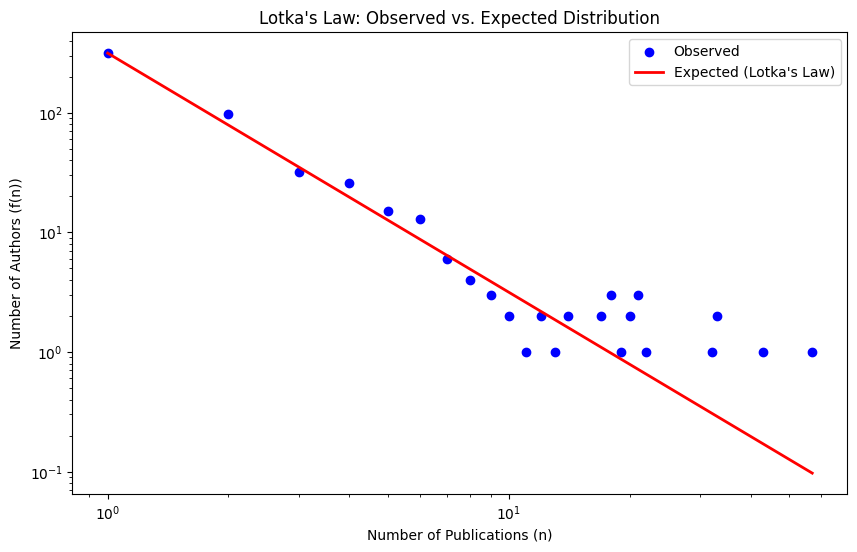

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(n, observed, color='blue', label='Observed')
plt.plot(n, expected, color='red', label='Expected (Lotka\'s Law)', linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Publications (n)')
plt.ylabel('Number of Authors (f(n))')
plt.title('Lotka\'s Law: Observed vs. Expected Distribution')
plt.legend()
plt.savefig('../../../images/lotkas_law.png', dpi=300)  # Save the figure as a PNG file with 300 dpi

plt.show()

Calculating best minimal value for power law fit
Estimated power law exponent (alpha): 2.639901946293893
Estimated minimum value for the power law (xmin): 4.0


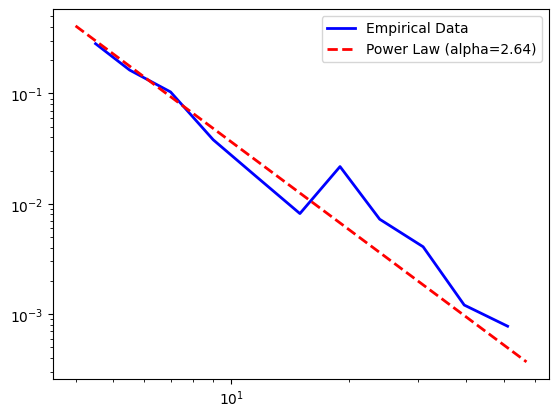

In [112]:
import powerlaw
import numpy as np

# Assuming `n` contains the number of publications and `observed` contains the frequency

# Repeat each value in `n` according to its frequency in `observed`
data = np.repeat(n, observed)

# Fit the power law to the data
fit = powerlaw.Fit(data)

# Get the estimated alpha (exponent of the power law)
alpha = fit.power_law.alpha
xmin = fit.power_law.xmin

print(f"Estimated power law exponent (alpha): {alpha}")
print(f"Estimated minimum value for the power law (xmin): {xmin}")

# Optionally, you can also plot the data and the fitted power law
import matplotlib.pyplot as plt

fig = fit.plot_pdf(color='b', linestyle='-', linewidth=2, label='Empirical Data')
fit.power_law.plot_pdf(color='r', linestyle='--', linewidth=2, ax=fig, label=f'Power Law (alpha={alpha:.2f})')

plt.legend()
plt.savefig('../../../images/law_estimated_by_powerlaw.png', dpi=300)  # Save the figure as a PNG file with 300 dpi

plt.show()